In [9]:
library(ArchR)
library(Seurat)
library(dplyr)
library(tidyr)
library(parallel)
library(ComplexHeatmap)
library(BSgenome.Mmusculus.UCSC.mm10)

ComplexHeatmap version 2.12.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [2]:
projdir <- '/nas/homes/benyang/HiC/13_MultiOme/ArchR_analysis'

addArchRGenome("mm10")
addArchRThreads(threads = 45) 

projAging4 <- readRDS(file.path(projdir, "Save-projAging4-01", "Save-ArchR-Project.rds"))

Setting default genome to Mm10.

Setting default number of Parallel threads to 45.



In [3]:
source(file.path(projdir, 'ArchR_utilities.R'))

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: mclust

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: ChIPseeker



ChIPseeker v1.32.1  For help: https://guangchuangyu.github.io/software/ChIPseeker

If you use ChIPseeker in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Qing-Yu He. ChIPseeker: an R/Bioconductor package for ChIP peak annotation, comparison and visualization. Bioinformatics 2015, 31(14):2382-2383


Attaching package: ‘ChIPseeker’


The following object is masked from ‘package:plyr’:

    .


Loading required package: TxDb.Mmusculus.UCSC.mm10.knownGene

Loading required package: GenomicFeatures

Loading required package: AnnotationDbi


Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from 

# Group coverages per cell type

In [4]:
projAging4 <- addGroupCoverages(ArchRProj = projAging4, groupBy = "celltype", minCells = 50, maxCells=500, minReplicates = 3, maxReplicates=6)

ArchR logging to : ArchRLogs/ArchR-addGroupCoverages-259b417a2cf9-Date-2022-12-23_Time-16-05-08.log
If there is an issue, please report to github with logFile!

B Cell (1 of 10) : CellGroups N = 4

Endothelial (2 of 10) : CellGroups N = 4

Macrophage (3 of 10) : CellGroups N = 4

MSC (4 of 10) : CellGroups N = 4

MuSC (5 of 10) : CellGroups N = 4

NK Cell (6 of 10) : CellGroups N = 3

Schwann Cell (7 of 10) : CellGroups N = 4

Smooth Muscle (8 of 10) : CellGroups N = 4

T Cell (9 of 10) : CellGroups N = 3

Tenocyte (10 of 10) : CellGroups N = 4

2022-12-23 16:05:22 : Creating Coverage Files!, 0.227 mins elapsed.

2022-12-23 16:05:22 : Batch Execution w/ safelapply!, 0.227 mins elapsed.

2022-12-23 16:06:46 : Adding Kmer Bias to Coverage Files!, 1.636 mins elapsed.

Completed Kmer Bias Calculation

Adding Kmer Bias (1 of 38)

Adding Kmer Bias (2 of 38)

Adding Kmer Bias (3 of 38)

Adding Kmer Bias (4 of 38)

Adding Kmer Bias (5 of 38)

Adding Kmer Bias (6 of 38)

Adding Kmer Bias (7 of 

In [5]:
pathToMacs2 <- findMacs2()

Searching For MACS2..

Found with $path!



## Add peak set

In [6]:
projAging5 <- addReproduciblePeakSet(
    ArchRProj = projAging4, 
    groupBy = "celltype", 
    pathToMacs2 = pathToMacs2
)

ArchR logging to : ArchRLogs/ArchR-addReproduciblePeakSet-259b7d7def6a-Date-2022-12-23_Time-16-08-19.log
If there is an issue, please report to github with logFile!

Calling Peaks with Macs2

2022-12-23 16:08:19 : Peak Calling Parameters!, 0.009 mins elapsed.



                      Group nCells nCellsUsed nReplicates nMin nMax maxPeaks
B Cell               B Cell   2591       1256           4   81  500   150000
Endothelial     Endothelial   4301       2000           4  500  500   150000
Macrophage       Macrophage   1658        959           4   80  500   150000
MSC                     MSC   5185       2000           4  500  500   150000
MuSC                   MuSC    997        997           4  191  289   150000
NK Cell             NK Cell   1940        845           3  138  500   150000
Schwann Cell   Schwann Cell   3823       1985           4  485  500   150000
Smooth Muscle Smooth Muscle   2310       1500           4  245  500   150000
T Cell               T Cell   1192        621           3   55  500   150000
Tenocyte           Tenocyte    933        933           4   96  499   150000


2022-12-23 16:08:19 : Batching Peak Calls!, 0.01 mins elapsed.

2022-12-23 16:08:19 : Batch Execution w/ safelapply!, 0 mins elapsed.

2022-12-23 16:11:36 : Identifying Reproducible Peaks!, 3.293 mins elapsed.

2022-12-23 16:11:50 : Creating Union Peak Set!, 3.529 mins elapsed.

Converged after 10 iterations!

Plotting Ggplot!

2022-12-23 16:12:01 : Finished Creating Union Peak Set (213488)!, 3.698 mins elapsed.



In [9]:
getPeakSet(projAging5)

GRanges object with 213488 ranges and 13 metadata columns:
                seqnames              ranges strand |     score
                   <Rle>           <IRanges>  <Rle> | <numeric>
  Smooth Muscle     chr1     3119787-3120287      * |  23.47013
            MSC     chr1     3120300-3120800      * |   2.87557
  Smooth Muscle     chr1     3121291-3121791      * |  13.20154
    Endothelial     chr1     3670793-3671293      * |  26.59403
            MSC     chr1     3671406-3671906      * |  66.96361
            ...      ...                 ...    ... .       ...
            MSC     chrX 169898939-169899439      * |   2.87543
    Endothelial     chrX 169899514-169900014      * |   2.11086
    Endothelial     chrX 169909808-169910308      * |  15.19923
    Endothelial     chrX 169915870-169916370      * |   4.08275
    Endothelial     chrX 169936780-169937280      * |   5.15871
                replicateScoreQuantile groupScoreQuantile Reproducibility
                             <numer

## Add peaks to object

In [12]:
projAging5 <- addPeakMatrix(projAging5)

ArchR logging to : ArchRLogs/ArchR-addPeakMatrix-259b3cdd9c60-Date-2022-12-23_Time-16-13-47.log
If there is an issue, please report to github with logFile!

2022-12-23 16:13:48 : Batch Execution w/ safelapply!, 0 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addPeakMatrix-259b3cdd9c60-Date-2022-12-23_Time-16-13-47.log



## Marker Features and heatmap

In [5]:
markersPeaks <- getMarkerFeatures(
    ArchRProj = projAging5, 
    useMatrix = "PeakMatrix", 
    groupBy = "celltype",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon"
)

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-f4b96da378f4-Date-2022-12-25_Time-22-11-34.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2022-12-25 22:11:36 : Matching Known Biases, 0.018 mins elapsed.

###########
2022-12-25 22:14:52 : Completed Pairwise Tests, 3.291 mins elapsed.
###########

ArchR logging successful to : ArchRLogs/ArchR-getMarkerFeatures-f4b96da378f4-Date-2022-12-25_Time-22-11-34.log



In [6]:
markerList <- getMarkers(markersPeaks, cutOff = "FDR <= 0.01 & Log2FC >= 1")

In [20]:
colnames(markersPeaks)

[1] "B Cell"        "Endothelial"   "Macrophage"    "MSC"          
 [5] "MuSC"          "NK Cell"       "Schwann Cell"  "Smooth Muscle"
 [9] "T Cell"        "Tenocyte"

In [27]:
heatmapPeaks <- plotMarkerHeatmap(
    seMarker = markersPeaks[,c('Endothelial','Smooth Muscle','MuSC','MSC','Tenocyte','Macrophage','B Cell','T Cell','NK Cell','Schwann Cell')], 
    cutOff = "FDR <= 0.01 & Log2FC >= 0.5",
    transpose = TRUE,
    returnMatrix = FALSE
)

ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-f4b969745532-Date-2022-12-25_Time-22-23-57.log
If there is an issue, please report to github with logFile!

Identified 92689 markers!



  [1] "chr1:4471279-4471779"   "chr1:4491897-4492397"   "chr1:4493405-4493905"  
  [4] "chr1:4497255-4497755"   "chr1:4543959-4544459"   "chr1:4571586-4572086"  
  [7] "chr1:4602322-4602822"   "chr1:4622359-4622859"   "chr1:4671692-4672192"  
 [10] "chr1:4706101-4706601"   "chr1:4766703-4767203"   "chr1:7100566-7101066"  
 [13] "chr1:10880268-10880768" "chr1:10948561-10949061" "chr1:10949115-10949615"
 [16] "chr1:12285441-12285941" "chr1:12291722-12292222" "chr1:12588641-12589141"
 [19] "chr1:17449225-17449725" "chr1:21166182-21166682" "chr1:21271941-21272441"
 [22] "chr1:21664944-21665444" "chr1:23174176-23174676" "chr1:23256640-23257140"
 [25] "chr1:24099573-24100073" "chr1:33966331-33966831" "chr1:34054927-34055427"
 [28] "chr1:34124776-34125276" "chr1:34253954-34254454" "chr1:34289430-34289930"
 [31] "chr1:12276169-12276669" "chr1:12571990-12572490" "chr1:14108384-14108884"
 [34] "chr1:14775170-14775670" "chr1:20069635-20070135" "chr1:20677942-20678442"
 [37] "chr1:24107303-2410780

Adding Annotations..

Preparing Main Heatmap..

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-f4b969745532-Date-2022-12-25_Time-22-23-57.log



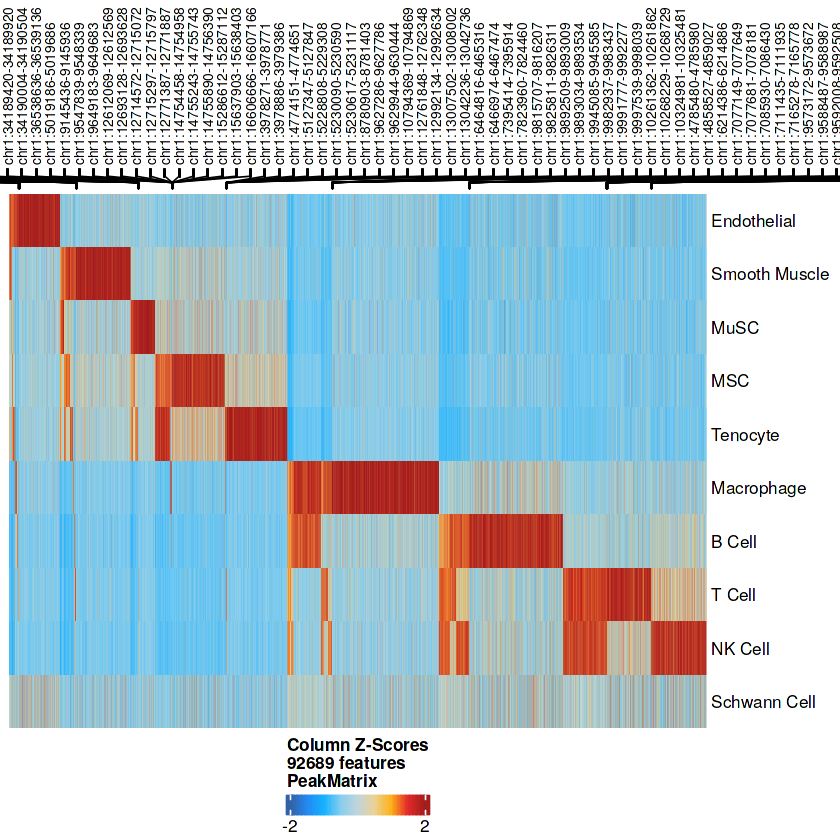

In [31]:
hmp <- draw(heatmapPeaks, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [34]:
plotPDF(hmp, 
        name = "Plot-celltype-peaks-heatmap.pdf", 
        ArchRProj = projAging5, 
        addDOC = FALSE, width = 6, height = 5)

Plotting ComplexHeatmap!



# Get QC metrics

In [40]:
colnames(projAging5@cellColData)

[1] "Sample"                            "TSSEnrichment"                    
 [3] "ReadsInTSS"                        "ReadsInPromoter"                  
 [5] "ReadsInBlacklist"                  "PromoterRatio"                    
 [7] "PassQC"                            "NucleosomeRatio"                  
 [9] "nMultiFrags"                       "nMonoFrags"                       
[11] "nFrags"                            "nDiFrags"                         
[13] "BlacklistRatio"                    "Age"                              
[15] "DoubletScore"                      "DoubletEnrichment"                
[17] "Harmony_4iter_Clusters_res0.1"     "Harmony_4iter_Clusters_res0.2"    
[19] "Harmony_4iter_Clusters_res0.3"     "Harmony_Age_Clusters_res0.1"      
[21] "Harmony_Age_Clusters_res0.2"       "Harmony_Age_Clusters_res0.3"      
[23] "New_Harmony_4iter_Clusters_res0.2" "Harmony_4iter_predictedCell_Un"   
[25] "Harmony_4iter_predictedGroup_Un"   "Harmony_4iter_predictedScore_Un"  
[27] "Harmony_4iter_predictedCell_Co"    "Harmony_4iter_predictedGroup_Co"  
[29] "Harmony_4iter_predictedScore_Co"   "celltype"                         
[31] "ReadsInPeaks"                      "FRIP"

In [46]:
df <- getCellColData(projAging5, select = c("Age","nFrags","TSSEnrichment","BlacklistRatio","FRIP"))

In [58]:
table(df$Age)


 Aged Young 
14327 10603 

In [57]:
df %>% 
    as.data.frame() %>% 
    pivot_longer(!Age, names_to="metrics", values_to="value") %>% 
    group_by(Age, metrics) %>% 
    summarise(med = median(value)) %>% 
    pivot_wider(id_cols = Age, names_from = "metrics", values_from = "med")

`summarise()` has grouped output by 'Age'. You can override using the `.groups` argument.


Age,BlacklistRatio,FRIP,nFrags,TSSEnrichment
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Aged,0.02299889,0.5293303,10016,19.407
Young,0.02278177,0.5516091,5451,25.149


## get peak matrices for median peaks per cell

In [51]:
peakmatrix <- getMatrixFromProject(projAging5, "PeakMatrix")
young_cellnames <- rownames(colData(peakmatrix)[(colData(peakmatrix)$Age == "Young"),])
aged_cellnames <- rownames(colData(peakmatrix)[(colData(peakmatrix)$Age == "Aged"),])

summary(Matrix::colSums(assay(peakmatrix)[,young_cellnames] > 0))
summary(Matrix::colSums(assay(peakmatrix)[,aged_cellnames] > 0))

ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-259b9290663-Date-2022-12-23_Time-16-59-33.log
If there is an issue, please report to github with logFile!

2022-12-23 17:00:23 : Organizing colData, 0.848 mins elapsed.

2022-12-23 17:00:24 : Organizing rowData, 0.852 mins elapsed.

2022-12-23 17:00:24 : Organizing rowRanges, 0.852 mins elapsed.

2022-12-23 17:00:24 : Organizing Assays (1 of 1), 0.853 mins elapsed.

2022-12-23 17:00:31 : Constructing SummarizedExperiment, 0.966 mins elapsed.

2022-12-23 17:00:53 : Finished Matrix Creation, 1.349 mins elapsed.



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    193    1280    3144    4595    6954   30999 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    224    1969    5273    7124   11452   37519 

# Save object

In [30]:
saveArchRProject(ArchRProj = projAging5, outputDirectory = file.path(projdir,"Save-projAging5-02"), load = FALSE)

Copying ArchRProject to new outputDirectory : /nas/homes/benyang/HiC/13_MultiOme/ArchR_analysis/Save-projAging5-02

Copying Arrow Files...

Copying Arrow Files (1 of 4)

Copying Arrow Files (2 of 4)

Copying Arrow Files (3 of 4)

Copying Arrow Files (4 of 4)

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 25): Aged

Copying Other Files (2 of 25): Aged_v2

Copying Other Files (3 of 25): celltype_markersGS.RDS

Copying Other Files (4 of 25): Embeddings

Copying Other Files (5 of 25): GroupCoverages

Copying Other Files (6 of 25): Harmony_4iter_Clusters_res0.2_cluster_markersGS.RDS

Copying Other Files (7 of 25): Harmony_Age_Clusters_res0.3_cluster_markersGS.RDS

Copying Other Files (8 of 25): IterativeLSI

Copying Other Files (9 of 25): IterativeLSI_4iter

Copying Other Files (10 of 25): IterativeLSI_4iter_10kvar

Copying Other Files (11 of 25): New_Harmony_4iter_Clusters_res0.2_cluster_markersGS.RDS

Copying Other Files (

In [4]:
projAging5 <- readRDS(file.path(projdir,"Save-projAging5-02","Save-ArchR-Project.rds"))

# Subset MuSCs and save as separate object

In [36]:
dir.create(file.path(projdir, "MuSC_subset", "all_MuSCs"), recursive = TRUE)

In [38]:
projAging_MuSC <- subsetArchRProject(projAging5, cells = getCellNames(projAging5[projAging5$celltype=="MuSC",]), 
                                     outputDirectory = file.path(projdir, "MuSC_subset", "all_MuSCs"), dropCells = TRUE, force = TRUE)

Copying ArchRProject to new outputDirectory : /nas/homes/benyang/HiC/13_MultiOme/ArchR_analysis/MuSC_subset/all_MuSCs

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 25): Aged

Copying Other Files (2 of 25): Aged_v2

Copying Other Files (3 of 25): celltype_markersGS.RDS

Copying Other Files (4 of 25): Embeddings

Copying Other Files (5 of 25): GroupCoverages

Copying Other Files (6 of 25): Harmony_4iter_Clusters_res0.2_cluster_markersGS.RDS

Copying Other Files (7 of 25): Harmony_Age_Clusters_res0.3_cluster_markersGS.RDS

Copying Other Files (8 of 25): IterativeLSI

Copying Other Files (9 of 25): IterativeLSI_4iter

Copying Other Files (10 of 25): IterativeLSI_4iter_10kvar

Copying Other Files (11 of 25): New_Harmony_4iter_Clusters_res0.2_cluster_markersGS.RDS

Copying Other Files (12 of 25): PeakCalls

Copying Other Files (13 of 25): Plots

Copying Other Files (14 of 25): projAging1-01.RDS

Copyi